## Import

In [ ]:
%load_ext autoreload
%autoreload 2
import logging

import pandas as pd
import seaborn as sns

import core.config as cfg
import core.explore as exp
import core.finance as fin
import helpers.dbg as dbg
import helpers.env as env
import helpers.printing as pri
import vendors.kibot.utils as kut

In [ ]:
print(env.get_system_signature())

pri.config_notebook()

# dbg.init_logger(verb=logging.DEBUG)
dbg.init_logger(verb=logging.INFO)
# dbg.test_logger()

_LOG = logging.getLogger(__name__)

# Metadata

## Read misc metadata

In [3]:
df1 = kut.read_metadata1()
df1.head(3)

,Symbol,Link,Description
1,JY,http://api.kibot.com/?action=download&link=151...,CONTINUOUS JAPANESE YEN CONTRACT
2,JYF18,http://api.kibot.com/?action=download&link=vrv...,JAPANESE YEN JANUARY 2018
3,JYF19,http://api.kibot.com/?action=download&link=8r8...,JAPANESE YEN JANUARY 2019


In [4]:
df2 = kut.read_metadata2()
df2.head(3)

,Symbol,Link,Description
1,JY,http://api.kibot.com/?action=download&link=151...,CONTINUOUS JAPANESE YEN CONTRACT
2,JYF18,http://api.kibot.com/?action=download&link=vrv...,JAPANESE YEN JANUARY 2018
3,JYF19,http://api.kibot.com/?action=download&link=8r8...,JAPANESE YEN JANUARY 2019


In [5]:
df3 = kut.read_metadata3()
df3.head(3)

,SymbolBase,Symbol,StartDate,Size(MB),Description,Exchange
1,ES,ES,9/30/2009,50610.0,CONTINUOUS E-MINI S&P 500 CONTRACT,Chicago Mercantile Exchange Mini Sized Contrac...
2,ES,ESH11,4/6/2010,891.0,E-MINI S&P 500 MARCH 2011,Chicago Mercantile Exchange Mini Sized Contrac...
3,ES,ESH12,3/6/2011,1060.0,E-MINI S&P 500 MARCH 2012,Chicago Mercantile Exchange Mini Sized Contrac...


In [6]:
df4 = kut.read_metadata4()
print(df4.head(3))

print(df4["Exchange"].unique())

  SymbolBase Symbol  StartDate  Size(MB)                                 Description                                  Exchange
1         JY     JY  9/27/2009     183.0            CONTINUOUS JAPANESE YEN CONTRACT  Chicago Mercantile Exchange (CME GLOBEX)
2         TY     TY  9/27/2009     180.0  CONTINUOUS 10 YR US TREASURY NOTE CONTRACT      Chicago Board Of Trade (CBOT GLOBEX)
3         FV     FV  9/27/2009     171.0   CONTINUOUS 5 YR US TREASURY NOTE CONTRACT      Chicago Board Of Trade (CBOT GLOBEX)
['Chicago Mercantile Exchange (CME GLOBEX)'
 'Chicago Board Of Trade (CBOT GLOBEX)'
 'Chicago Mercantile Exchange Mini Sized Contracts (CME MINI)'
 'Commodities Exchange Center (COMEX GLOBEX)'
 'New York Mercantile Exchange (NYMEX GLOBEX)'
 'Chicago Board Of Trade Mini Sized Contracts (CBOT MINI)'
 'New York Mercantile Exchange Mini Sized Contracts'
 'CBOE Futures Exchange (CFE)']


## Explore metadata

In [7]:
mask = ["GAS" in d or "OIL" in d for d in df4["Description"]]
print(sum(mask))
print(df4[mask].drop(["SymbolBase", "Size(MB)"], axis=1))

7
   Symbol  StartDate                                   Description                                           Exchange
10     CL  9/27/2009                 CONTINUOUS CRUDE OIL CONTRACT        New York Mercantile Exchange (NYMEX GLOBEX)
20     NG  9/27/2009               CONTINUOUS NATURAL GAS CONTRACT        New York Mercantile Exchange (NYMEX GLOBEX)
24     QM  9/27/2009          CONTINUOUS E-MINI CRUDE OIL CONTRACT  New York Mercantile Exchange Mini Sized Contracts
29     RB  9/27/2009             CONTINUOUS RBOB GASOLINE CONTRACT        New York Mercantile Exchange (NYMEX GLOBEX)
35     BO  9/27/2009               CONTINUOUS SOYBEAN OIL CONTRACT               Chicago Board Of Trade (CBOT GLOBEX)
43     BZ  9/28/2009  CONTINUOUS BRENT CRUDE OIL LAST DAY CONTRACT        New York Mercantile Exchange (NYMEX GLOBEX)
49     QG  9/27/2009        CONTINUOUS E-MINI NATURAL GAS CONTRACT  New York Mercantile Exchange Mini Sized Contracts


# Price data

## Read continuous daily prices for single futures

In [8]:
s = "CL"
# nrows = None
nrows = 10000
# file_name = "s3://alphamatic/kibot/All_Futures_Contracts_1min/%s.csv.gz" % s
file_name = (
    "s3://alphamatic/kibot/All_Futures_Continuous_Contracts_daily/%s.csv.gz" % s
)
df = kut.read_data(file_name, nrows)
df.head(3)

Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_daily/CL.csv.gz' nrows=10000


,open,high,low,close,vol
date,,,,,
1996-08-16,21.46,22.10,21.34,22.05,28704
1996-08-19,21.91,22.57,21.91,22.47,41736
1996-08-20,22.41,22.43,22.10,22.11,38759


## Read continuous 1-min prices for single futures

In [9]:
s = "CL"
# nrows = None
nrows = 10000
# file_name = "s3://alphamatic/kibot/All_Futures_Contracts_1min/%s.csv.gz" % s
file_name = (
    "s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/%s.csv.gz" % s
)
df = kut.read_data(file_name, nrows)
df.head(3)

Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/CL.csv.gz' nrows=10000


,open,high,low,close,vol,time
datetime,,,,,,
2009-09-27 18:00:00,66.15,66.35,66.15,66.32,88,18:00:00
2009-09-27 18:01:00,66.36,66.49,66.35,66.37,124,18:01:00
2009-09-27 18:02:00,66.37,66.41,66.37,66.37,25,18:02:00


In [10]:
## Read continuous 1-min prices for multiple futures

## Read continuous daily prices for multiple futures

In [11]:
symbols = "CL NG RB BZ".split()
file_name = (
    "s3://alphamatic/kibot/All_Futures_Continuous_Contracts_daily/%s.csv.gz"
)
nrows = 10000

daily_price_dict_df = kut.read_multiple_symbol_data(
    symbols, file_name, nrows=nrows
)

daily_price_dict_df["CL"].head(3)

Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_daily/NG.csv.gz' nrows=10000
Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_daily/RB.csv.gz' nrows=10000
Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_daily/BZ.csv.gz' nrows=10000


,open,high,low,close,vol
date,,,,,
1996-08-16,21.46,22.10,21.34,22.05,28704
1996-08-19,21.91,22.57,21.91,22.47,41736
1996-08-20,22.41,22.43,22.10,22.11,38759


## Read continuous 1-min prices for multiple futures

In [12]:
symbols = "CL NG RB BZ".split()
file_name = (
    "s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/%s.csv.gz"
)
nrows = 10000

daily_price_dict_df = kut.read_multiple_symbol_data(
    symbols, file_name, nrows=nrows
)

daily_price_dict_df["CL"].head(3)

Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/NG.csv.gz' nrows=10000
Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/RB.csv.gz' nrows=10000
Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/BZ.csv.gz' nrows=10000


,open,high,low,close,vol,time
datetime,,,,,,
2009-09-27 18:00:00,66.15,66.35,66.15,66.32,88,18:00:00
2009-09-27 18:01:00,66.36,66.49,66.35,66.37,124,18:01:00
2009-09-27 18:02:00,66.37,66.41,66.37,66.37,25,18:02:00


## Read data through config API

In [ ]:
config = cfg.Config.from_env()

if config is None:
    config = cfg.Config()
    config_tmp = config.add_subconfig("read_data")
    # Use the data from S3.
    file_name = "s3://alphamatic/kibot/All_Futures_Contracts_1min/ES.csv.gz"
    config_tmp["file_name"] = file_name
    config_tmp["nrows"] = 100000

_LOG.info(config)

In [ ]:
df = kut.read_data_from_config(config["read_data"])

_LOG.info("df.shape=%s", df.shape)
_LOG.info("datetimes=[%s, %s]", df.index[0], df.index[-1])
_LOG.info("df=\n%s", df.head(3))

## Read raw data directly from S3

In [15]:
s = "CL"
file_name = (
    "s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/%s.csv.gz" % s
)
nrows = 10000

df = pd.read_csv(file_name, header=None, parse_dates=[0], nrows=nrows)
# df.columns = "datetime open high low close vol".split()
df.head(3)

,0,1,2,3,4,5,6
0,2009-09-27,18:00,66.15,66.35,66.15,66.32,88
1,2009-09-27,18:01,66.36,66.49,66.35,66.37,124
2,2009-09-27,18:02,66.37,66.41,66.37,66.37,25


# Return computation

## 1-min for single futures

In [16]:
# TODO(gp)

## 1-min for multiple futures

In [17]:
# Read multiple futures.
symbols = "CL NG RB BZ".split()
file_name = (
    "s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/%s.csv.gz"
)
nrows = 100000
min_price_dict_df = kut.read_multiple_symbol_data(symbols, file_name, nrows=nrows)

_LOG.info("keys=%s", min_price_dict_df.keys())
min_price_dict_df["CL"].tail(3)

Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/CL.csv.gz' nrows=100000
Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/NG.csv.gz' nrows=100000
Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/RB.csv.gz' nrows=100000
Reading file_name='s3://alphamatic/kibot/All_Futures_Continuous_Contracts_1min/BZ.csv.gz' nrows=100000
keys=dict_keys(['CL', 'NG', 'RB', 'BZ'])


,open,high,low,close,vol,time
datetime,,,,,,
2010-01-19 03:45:00,77.98,77.98,77.97,77.97,4,03:45:00
2010-01-19 03:46:00,77.96,77.97,77.96,77.97,5,03:46:00
2010-01-19 03:47:00,77.96,77.96,77.96,77.96,4,03:47:00


### Compute returns ret_0

In [18]:
mode = "pct_change"
min_rets = kut.compute_ret_0_from_multiple_1min_prices(min_price_dict_df, mode)

min_rets.head(3)

,CL_ret_0,NG_ret_0,RB_ret_0,BZ_ret_0
datetime,,,,
2009-09-27 18:00:00,NaN,NaN,NaN,NaN
2009-09-27 18:01:00,0.003175,-0.001261,NaN,NaN
2009-09-27 18:02:00,0.000151,NaN,NaN,NaN


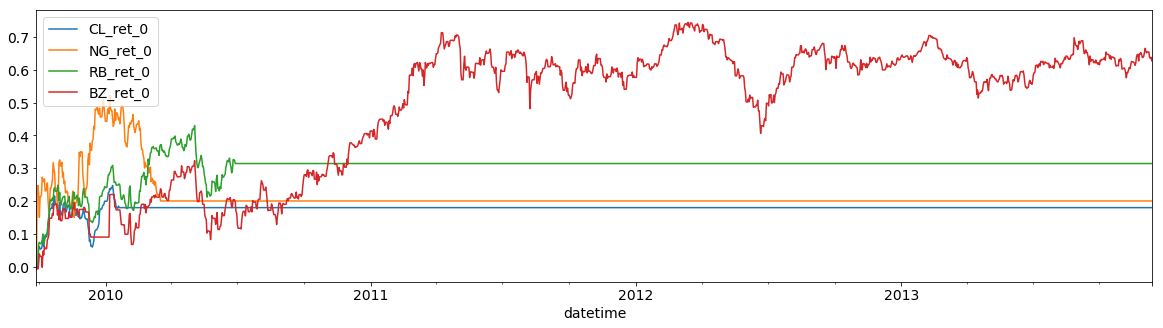

In [19]:
min_rets.fillna(0.0).resample("1D").sum().cumsum().plot()

### Resample to 1min

In [ ]:
# Resample to 1min.
_LOG.info("## Before resampling")
exp.report_zero_nan_inf_stats(min_rets)

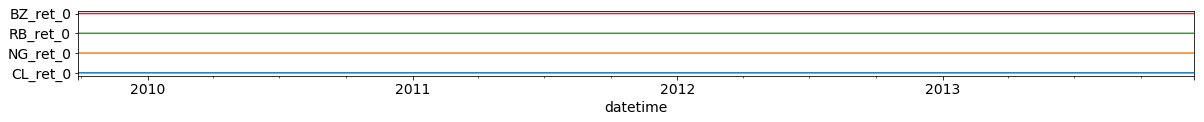

In [21]:
exp.plot_non_na_cols(min_rets.resample("1D").sum())

In [ ]:
min_rets = fin.resample_1min(min_rets, skip_weekends=False)

_LOG.info("## After resampling")
exp.report_zero_nan_inf_stats(min_rets)

min_rets.fillna(0.0, inplace=True)

### z-scoring

In [23]:
zscore_com = 28
min_zrets = fin.zscore(
    min_rets, com=zscore_com, demean=False, standardize=True, delay=1
)
min_zrets.columns = [c.replace("ret_", "zret_") for c in min_zrets.columns]
min_zrets.dropna().head(3)

,CL_zret_0,NG_zret_0,RB_zret_0,BZ_zret_0
2009-09-29 10:36:00,0.000000,-0.108223,2.813347,-inf
2009-09-29 10:37:00,2.981088,2.420640,0.590787,0.0
2009-09-29 10:38:00,3.080418,2.871281,0.000000,0.0


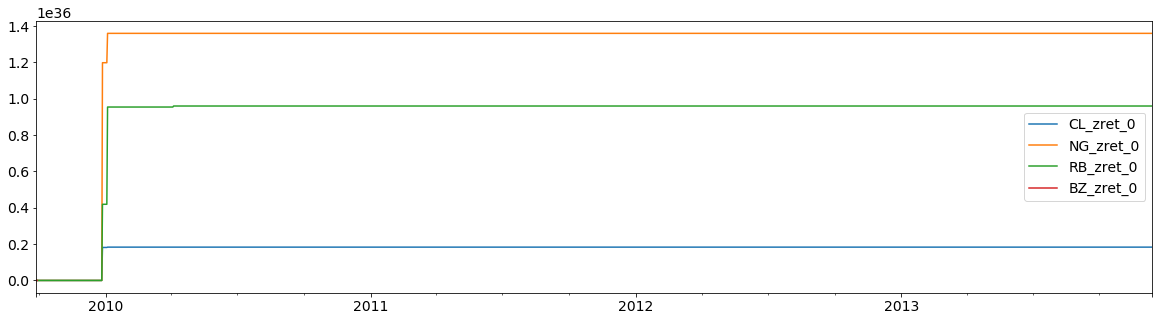

In [24]:
min_zrets.fillna(0.0).resample("1D").sum().cumsum().plot()

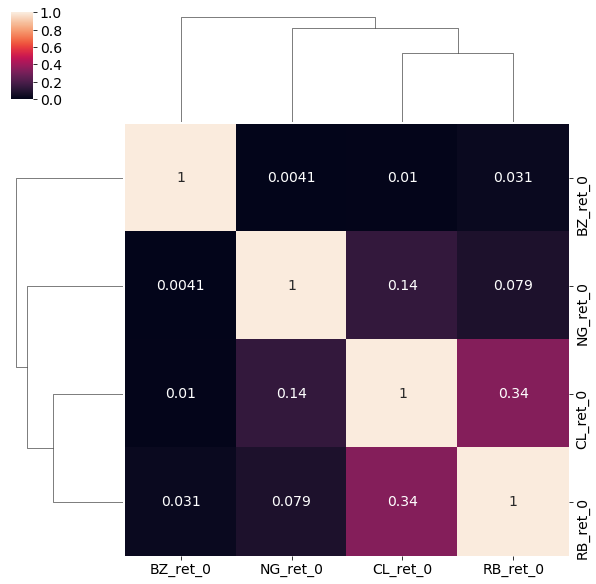

In [27]:
annot = True
stocks_corr = min_rets.dropna().corr()

sns.clustermap(stocks_corr, annot=annot)

## Daily for single futures

## Daily for multiple futures